# Basic heatmaps in R
Using heatmap.3, which extends heatmap.2, which extends heatmap of the {stats} library in base R.

## Installations and setup of the R kernel

In [1]:
# Install packages
# install.packages(c("RColorBrewer", "devtools"))

In [2]:
# Load libraries
library(RColorBrewer)  # for better color choices
library(devtools)  # for installing heatmap.3
# Load heatmap.3
source_url("https://raw.githubusercontent.com/obigriffith/biostar-tutorials/master/Heatmaps/heatmap.3.R")


SHA-1 hash of file is e0a2ae0c0a4c2ddaefb2b3e9bb4551c430535a98


## Generate expression matrix
First simulates a gene expression matrix. For real data, load the data into a matrix format.

In [3]:
# Simulate gene expression data with provided dimensions
ngenes = 100  # number of genes
nsamples = 5  # number of samples

# Generate data from indepedent Gaussian distributions
emat = matrix(rnorm(ngenes * nsamples, mean=1, sd=2),
              nrow=ngenes,
              ncol=nsamples)
# Name rows and columns for easier retrieval (and less possibilities for errors in mapping gene names)
rownames(emat) = 1:ngenes
colnames(emat) = 1:nsamples

In [4]:
# Print parts of the matrix
head(emat)

,1,2,3,4,5
1,0.6274856,1.3332037,3.2743064,-0.2261868,2.202739
2,2.7938419,2.5885398,1.9393628,4.2745629,2.690643
3,0.9063636,2.8708759,0.1560136,2.0776361,-3.244162
4,3.5494484,1.4701185,2.8660052,-1.1664534,2.017630
5,1.0892540,1.4356480,1.3032643,-2.6456048,2.015112
6,2.2364123,0.4953685,6.2249764,1.5011725,1.492908


## Standardization
This step is particularly important if your data has a different dynamic range for each gene, which is typically the case.

In [5]:
# Standardize each row (z-scores)
emat_scaled = t(scale(t(emat)))  # scale operates on columns

In [6]:
# Select subset of standardized expression matrix
genes_include = c("1", "12", "65", "88", "4", "5")  # genes to include
emat_scaled_subset = emat_scaled[rownames(emat_scaled) %in% genes_include, ] 
emat_scaled_subset

,1,2,3,4,5
1,-0.5993059,-0.08024780,1.3474401,-1.2271850,0.5592986
4,0.9943188,-0.15296396,0.6172249,-1.6077084,0.1491286
5,0.2407211,0.42613539,0.3552744,-1.7584359,0.7363051
12,1.2553385,-1.21334820,0.3917181,0.3766174,-0.8103257
65,0.5640990,1.08727092,0.4690024,-1.1860465,-0.9343258
88,0.3488199,-0.07536135,0.9322165,0.4641187,-1.6697938


## Plot biclustered heatmap
Including sample class colors. For additional options see https://raw.githubusercontent.com/obigriffith/biostar-tutorials/master/Heatmaps/heatmap.3.R
or, with similar options, 
https://www.rdocumentation.org/packages/gplots/versions/3.0.1/topics/heatmap.2
### Ploting device
Here the default plot device is used. I recommend plotting to a support vector file (such as a .pdf file). In this way, it is easier to replicate figures.

In [7]:
# Setup plot
# pdf("heatmap.pdf", height=5, width=4)  # plot to pdf file, uncomment
options(repr.plot.height=5, repr.plot.width=4)  # options for adjusting plot size, only for Jupyter
ncolor_grad = 100  # number of colors in gradient

# Sample two types of colors for each sample
rlab = matrix(sample(brewer.pal(9, "Set1"), nsamples * 2, replace=TRUE),
              ncol=2)
colnames(rlab) = c("Annotation 1", "Annotation 2")

In [8]:
# View sample color matrix
rlab

Annotation 1,Annotation 2
#FFFF33,#FF7F00
#A65628,#A65628
#984EA3,#999999
#999999,#FF7F00
#E41A1C,#377EB8


Warning message in image.default(z = matrix(z, ncol = 1), col = col, breaks = tmpbreaks, :
“unsorted 'breaks' will be sorted before use”

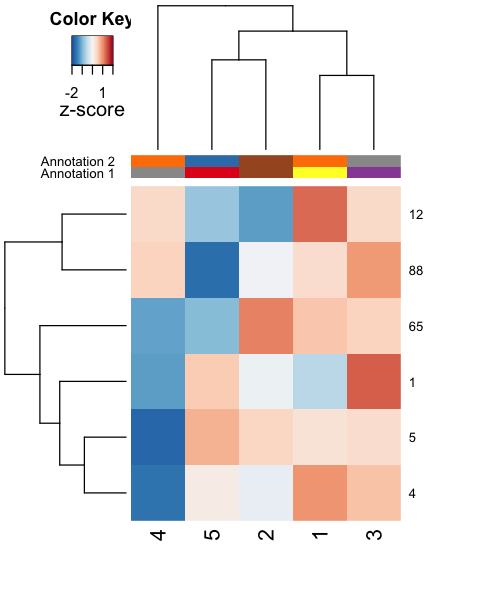

In [9]:
heatmap.3(emat_scaled_subset,
    col=colorRampPalette(rev(brewer.pal(9, "RdBu")))(ncolor_grad),
    cexRow=1.0,
    KeyValueName="z-score",
    breaks=seq(-2, 2, length.out=ncolor_grad + 1),  # cap of coloring 
    ColSideColors=rlab,
    ColSideColorsSize=2
)
# dev.off()  # close pdf connection, for writing to files only